![](image_2.png)

# Business case study : Product Sales Forecasting 



**Business Problem-**

        Accurate sales forecasting is essential for operational and strategic planning in the fiercely competitive 
        
        retail sector. With the help of a variety of influencing variables, including business type, location, 
        
        regional traits, promotional activities, and temporal fluctuations (such holidays and seasons), 
        
        product sales forecasting seeks to predict how many products a store will sell in the future. 
        
        In order to forecast sales for future periods, this project focuses on building a predictive model that 
        
        utilizes previous sales data from various stores.

        

_**Importing Python Libraries necessary while carrying out data exploration & visualisation**_ -
    


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import re

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from scipy.stats import ttest_1samp, ttest_ind


from scipy.stats import chisquare    # statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency  # when expected value has to be computed
from scipy.stats import chi2  # distribution


from scipy.stats import f_oneway, kruskal    # Numeric vs categorical for many categories
from scipy.stats import ttest_ind     # Numeric vs categorical
from scipy.stats import shapiro     # Test Gaussian :-  50 to 200 samples
from scipy.stats import levene     # Test variance
from scipy.stats import ks_2samp
from statsmodels.graphics.gofplots import qqplot


from scipy.stats import spearmanr, ttest_rel


_**Upload & read csv file in pandas dataframe**_ -
    

In [2]:
df_train = pd.read_csv("TRAIN.csv")
df_test = pd.read_csv("TEST_FINAL.csv")

In [3]:
df_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
df_train.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41
188339,T1188340,152,S2,L1,R1,2019-05-31,1,No,47,37977.00


In [5]:
df_test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


-----------

**Observations on -**

    1) shape of data
    
    2) data types
    
    

In [6]:
df_train.shape

(188340, 10)

In [7]:
df_test.shape

(22265, 8)

In [8]:
df_train.size

1883400

In [9]:
df_train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [10]:
df_train.nunique()

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


    Comments -
    
        No null values present in the dataset.
        

    Let's Drop some unwanted columns -
    

In [12]:
df_train.drop(['ID'],axis=1,inplace=True)
df_test.drop(['ID'],axis=1,inplace=True)

In [13]:
df_train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [14]:
df_train.describe(include = "object")


,Store_Type,Location_Type,Region_Code,Date,Discount
count,188340,188340,188340,188340,188340
unique,4,5,4,516,2
top,S1,L1,R1,2018-01-01,No
freq,88752,85140,63984,365,104051



------

**Check for duplicates Values -**


In [15]:
# Duplicate values -

df_train[df_train.duplicated()]

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales


    Comment -
    
        No Duplicate values present in dataset.
        

-----


## Block 2: EDA and Hypothesis testing


**Non Graphical & Graphical Analysis -**


    **Univarate Analysis -
    

In [16]:
# Store Type -

df_train["Store_Type"].value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

<Axes: xlabel='Store_Type', ylabel='count'>

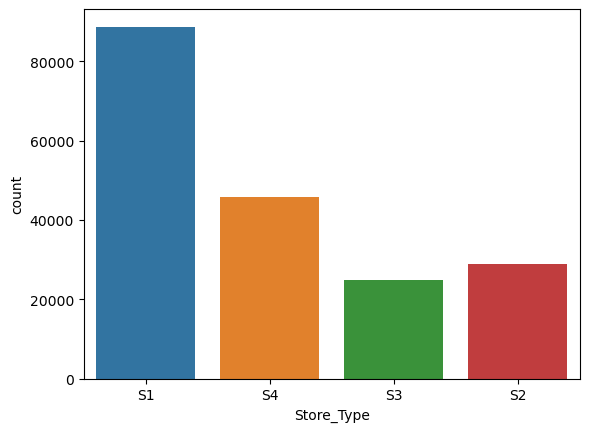

In [17]:
sns.countplot(data = df_train, x = "Store_Type")

    Comments -
    
        1) S1 store types are present in higher numbers as compared to other store types.
        


In [18]:
# Location Type -

df_train["Location_Type"].value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

<Axes: xlabel='Location_Type', ylabel='count'>

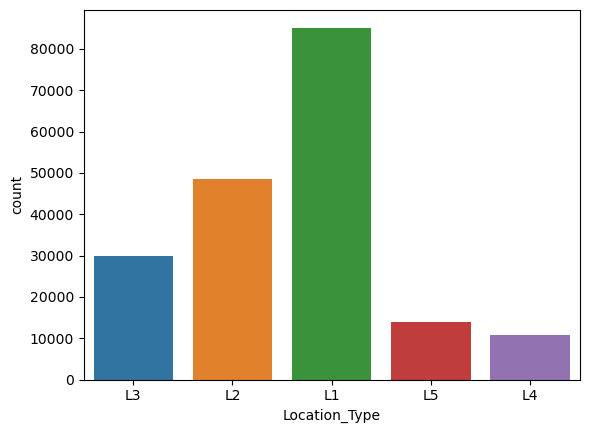

In [19]:
sns.countplot(data = df_train, x = "Location_Type")

    Comments -
    
        1) L1 Location type is present in higher numbers as compared to others.
        


In [20]:
# Region Code -

df_train["Region_Code"].value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

<Axes: xlabel='Region_Code', ylabel='count'>

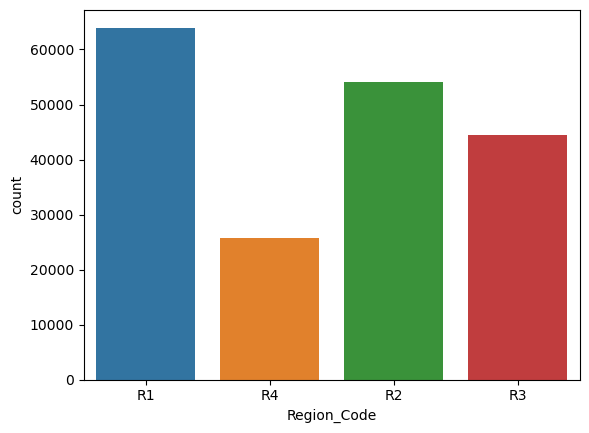

In [21]:
sns.countplot(data = df_train, x = "Region_Code")

    Comments -
    
        1) Region code R1 & R2 have majority count.
        


In [22]:
# Holiday -

df_train["Holiday"].value_counts()

0    163520
1     24820
Name: Holiday, dtype: int64

<Axes: xlabel='Holiday', ylabel='count'>

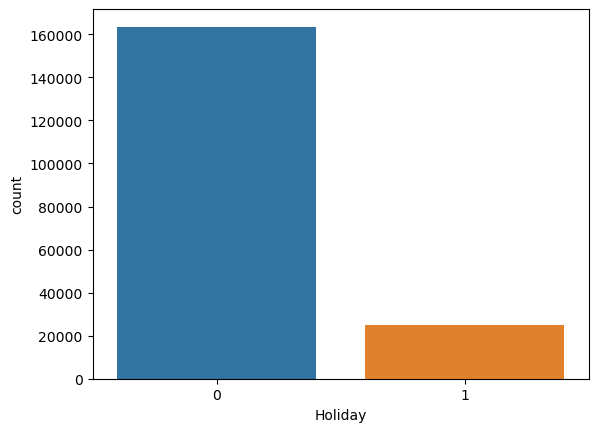

In [23]:
sns.countplot(data = df_train, x = "Holiday")

    Comments -
    
        1) Holidays are not present most of the times.
        


In [24]:
# Discounts -

df_train["Discount"].value_counts(normalize = True) * 100

No     55.246363
Yes    44.753637
Name: Discount, dtype: float64

<Axes: xlabel='Discount', ylabel='count'>

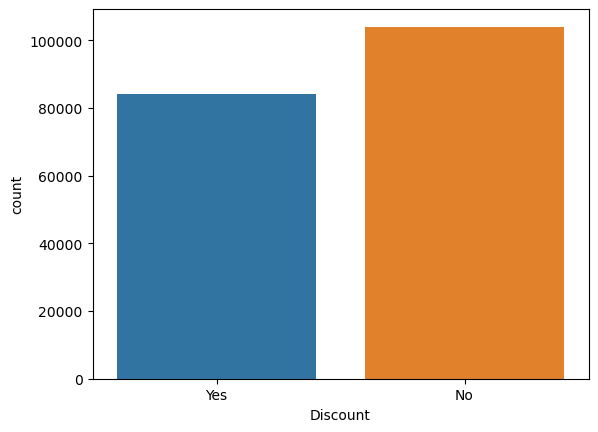

In [25]:
sns.countplot(data = df_train, x = "Discount")

    Comments -
    
        1) Nearly 45% times, discounts were offered.
        


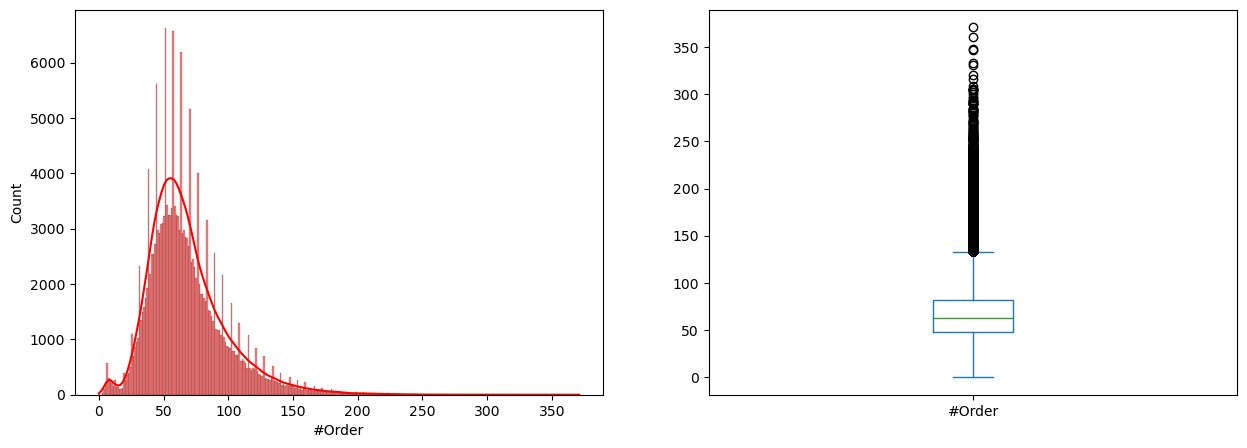

In [26]:
# Distribution of orders -

plt.figure(figsize = (15, 5))

plt.subplot(121)
sns.histplot(data = df_train, x = "#Order", kde = True, color = "Red")

plt.subplot(122)
df_train["#Order"].plot.box()

plt.show()

    Comments -
    
        1) Most of the times the no. of orders are between 50-70.
        
        2) Boxplot shows presence of outliers in the dataset.
        


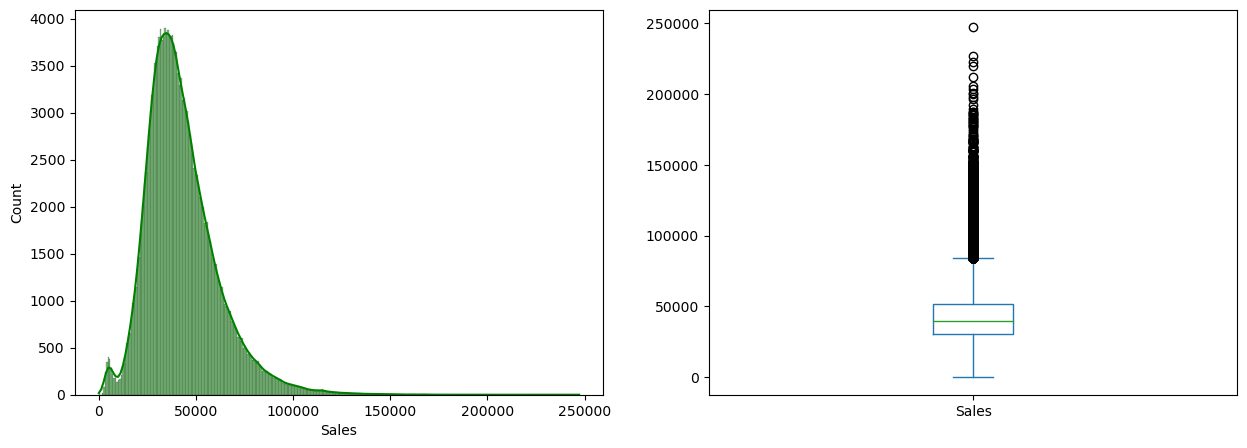

In [27]:
# Distribution of sales -

plt.figure(figsize = (15, 5))

plt.subplot(121)
sns.histplot(data = df_train, x = "Sales", kde = True, color = "Green")

plt.subplot(122)
df_train["Sales"].plot.box()

plt.show()

    Comments -
    
        1) Most of the times the sales are between 40k - 50k.
        
        2) Boxplot shows presence of outliers in the dataset.
        


    **Bivariate Analysis -
    

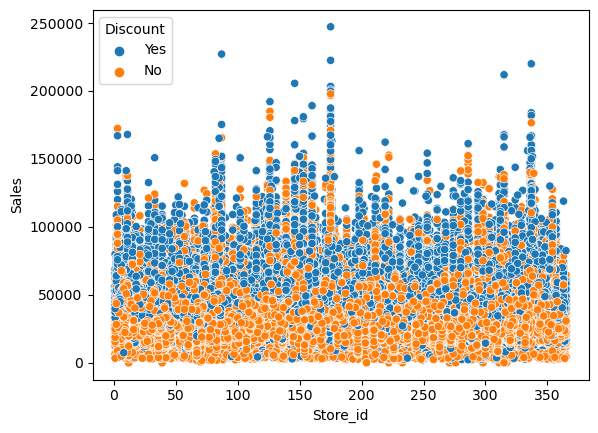

In [28]:
# Scatterplot of Sales vs store_id (hue as Discount)
sns.scatterplot(x = "Store_id", y = "Sales", hue = "Discount", data = df_train)
plt.show()

    Comments -
    
        1) Stores which are giving discounts have good amount of sales.
        


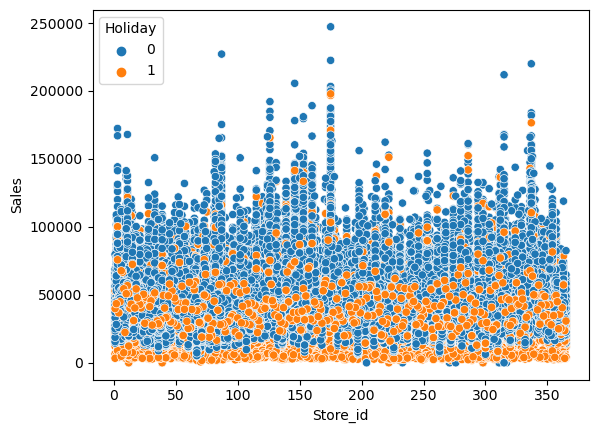

In [29]:
# Scatterplot of Sales vs store_id (hue as Holiday)
sns.scatterplot(x = "Store_id", y = "Sales", hue = "Holiday", data = df_train)
plt.show()

    Comments -
    
        1) Maximum sales on working days.
        


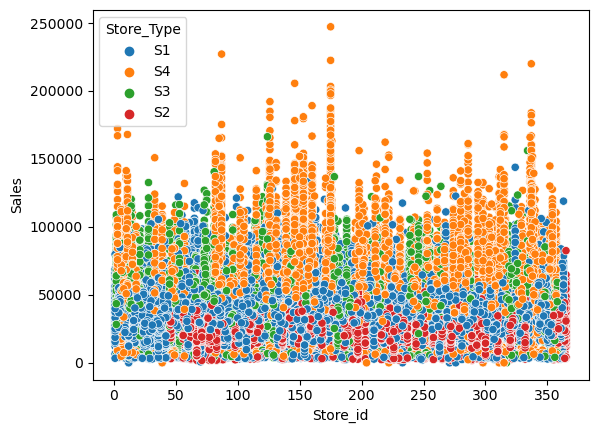

In [30]:
# Scatterplot of Sales vs store_id (hue as Store types)
sns.scatterplot(x = "Store_id", y = "Sales", hue = "Store_Type", data = df_train)
plt.show()

    **Multivariate Analysis -
    

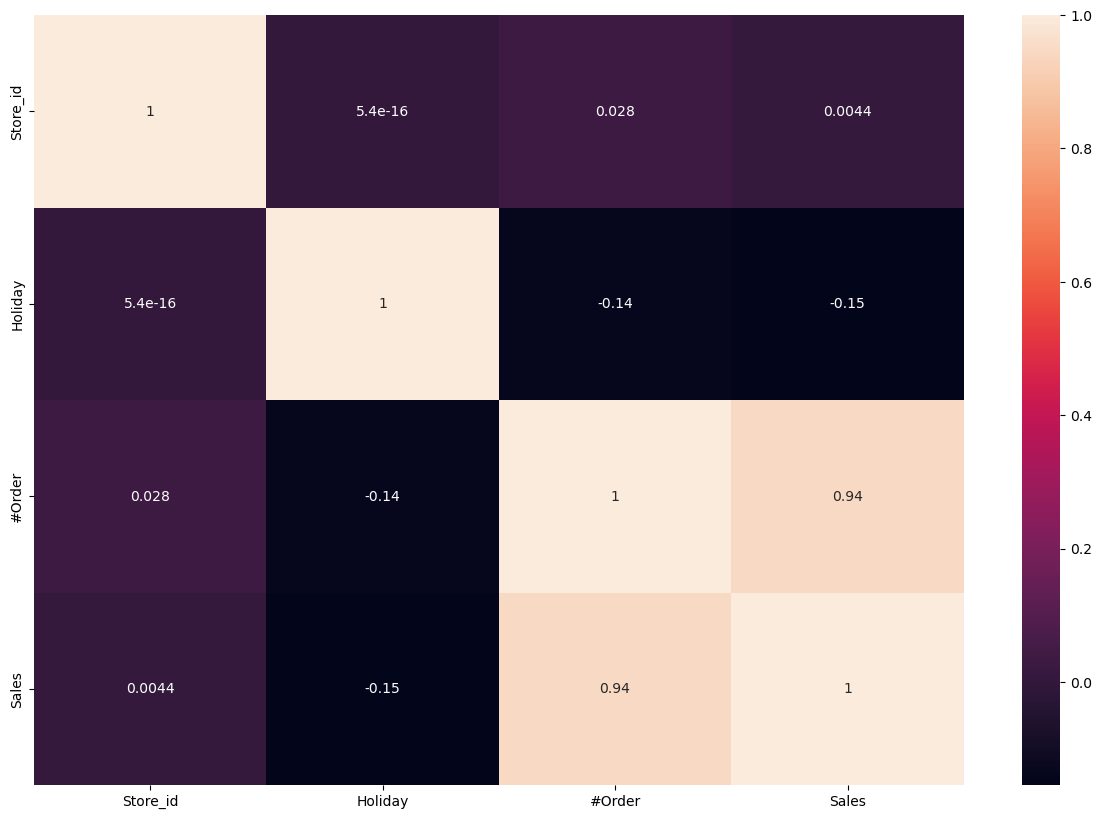

In [31]:
# Correlation amongst different features -
plt.figure(figsize = (15, 10))

sns.heatmap(df_train.corr(method = "pearson"), annot = True)
plt.show()

    Comments -
    
        1) No of orders and sales have high correlation.
        
        

-------

    Q.1 Which are the best stores (by number of sells)?
    

In [32]:
# sum sales from same store
best_stores = df_train.groupby(['Store_id'], as_index = False)['Sales'].sum() 

# sort data
best_stores = best_stores.sort_values('Sales', ascending = False)  

# select top 20
best_stores = best_stores.head(20)               

best_stores['Store_id'] = best_stores['Store_id'].astype(str)

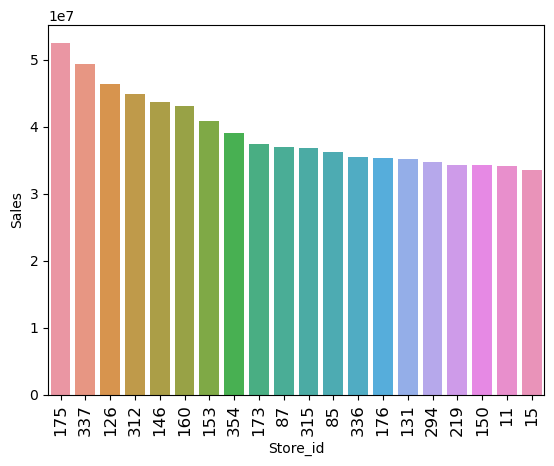

In [33]:
sns.barplot(x = "Store_id", y = "Sales", data = best_stores, estimator = np.sum)
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

    Q.2 Which are the best store types (by number of sales)?
    

In [34]:
best_store_type = df_train.groupby(['Store_Type'], as_index = False)['Sales'].sum() 

best_store_type = best_store_type.sort_values('Sales', ascending = False)                  

best_store_type['Store_Type'] = best_store_type['Store_Type'].astype(str)


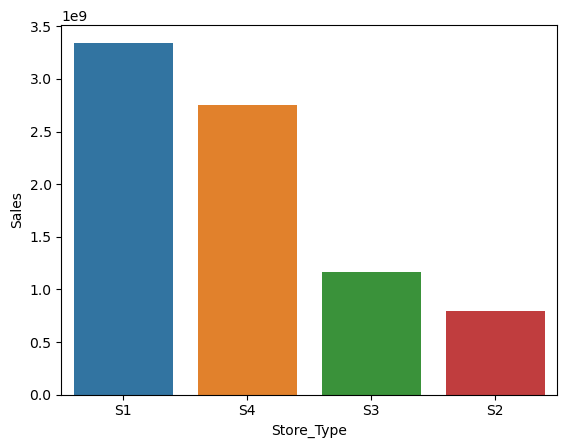

In [35]:
sns.barplot(x = "Store_Type", y = "Sales", data = best_store_type, estimator = np.sum)
plt.show()

    Q.3 Best months by sells -
    

In [36]:
df_train['Date'] = pd.to_datetime(df_train.Date)
best_month = df_train.copy()
best_month['Month'] = best_month['Date'].apply(lambda x: x.strftime('%b-%Y')) 
best_month = best_month.groupby(['Month'], as_index=False)['Sales'].sum() 

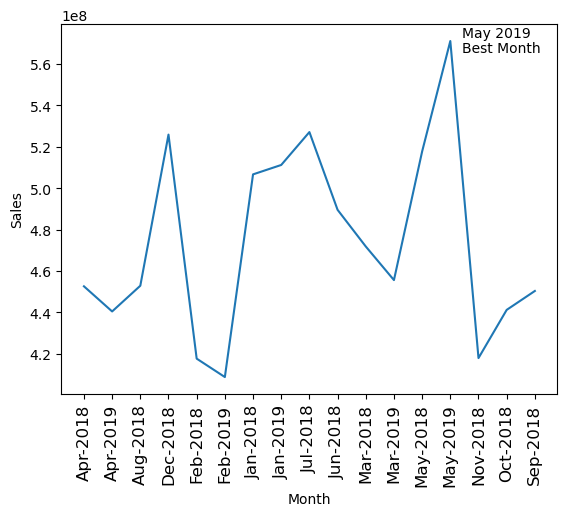

In [37]:
sns.lineplot(x = "Month", y = "Sales", data = best_month)
plt.xticks(rotation = 90, fontsize = 12)
plt.text(13.4, 573000000, "May 2019", size=10)
plt.text(13.4, 566000000, "Best Month", size=10)
plt.show()

    Q.4 Which are the best locations (by number of sales)?
    

In [38]:
best_location = df_train.groupby(['Location_Type'], as_index = False)['Sales'].sum()  

best_location['Location_Type'] = best_location['Location_Type'].astype(str)

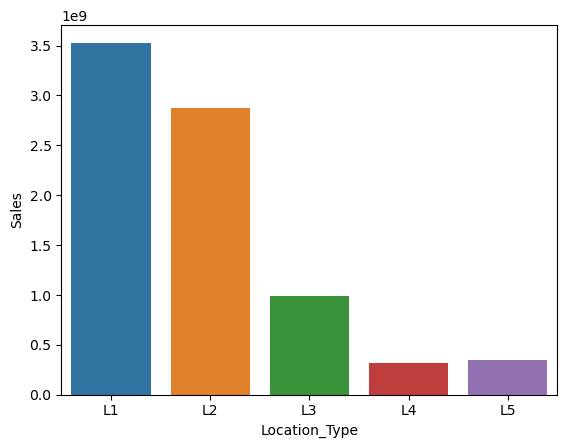

In [39]:
sns.barplot(x = "Location_Type", y = "Sales", data = best_location, estimator = np.sum)
plt.show()

    Q.5 Which are the best regions (by number of sales)?


In [40]:
best_region = df_train.groupby(['Region_Code'], as_index = False)['Sales'].sum()    
best_region['Region_Code'] = best_region['Region_Code'].astype(str)

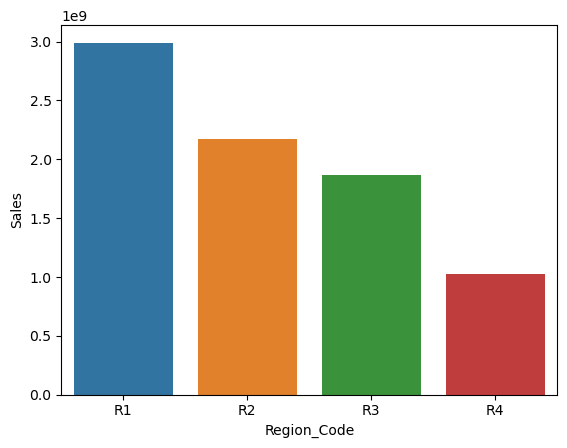

In [41]:
sns.barplot(x = "Region_Code", y = "Sales", data = best_region, estimator = np.sum)
plt.show()

------

    **Time Series Analysis -
    

In [42]:
df_train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [43]:
df_train_time = df_train.groupby('Date')["Sales"].sum().reset_index()

In [44]:
df_train_time.head()

,Date,Sales
0,2018-01-01,15345484.5
1,2018-01-02,19592415.0
2,2018-01-03,18652527.0
3,2018-01-04,19956267.0
4,2018-01-05,22902651.0


In [45]:
result = sm.tsa.seasonal_decompose(df_train_time['Sales'].values, model = 'additive', period = 7)

<Figure size 640x480 with 0 Axes>

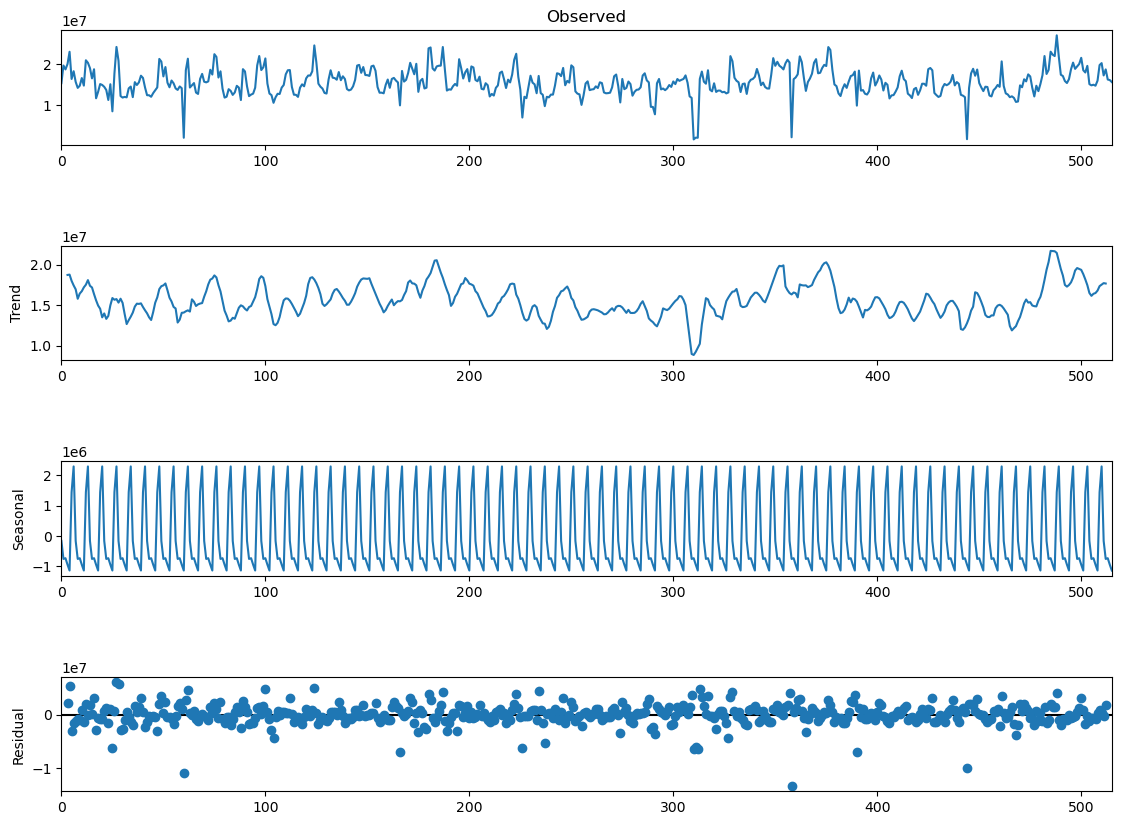

In [46]:
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(12, 9)
fig.show()


-------

    Let's drop orders column as it is highly correlated. 


In [47]:
df_train.drop(['#Order'],axis=1,inplace=True)

----

**Hypothesis Testing -**


    Hypothesis 1: Impact of Discounts on Sales.


In [48]:
discount_sale = df_train[df_train["Discount"] == "Yes"]["Sales"]

non_discount_sale = df_train[df_train["Discount"] == "No"]["Sales"]

In [49]:
#H0 : Stores offering discounts will not have significantly higher sales than stores not offering discounts
# Ha : Stores offering discounts will have significantly higher sales than stores not offering discounts

t, p = ttest_ind(discount_sale, non_discount_sale, alternative = "greater")

In [50]:
p

0.0

    Comments -
    
       1) p Value(0.0) is smaller than the significance value (alpha = 0.05),

            Hence we are rejecting Null Hypothesis.

       2) So we can say that, Stores offering discounts will have significantly higher sales than stores
        
            not offering discounts.

    Hypothesis 2: Effect of Holidays on Sales.


In [51]:
holiday_sale = df_train[df_train["Holiday"] == 1]["Sales"]

non_holiday_sale = df_train[df_train["Holiday"] == 0]["Sales"]

In [52]:
#H0 : Sales on holidays are not higher than sales on non-holidays
# Ha : Sales on holidays are higher compared to non-holidays

t, p = ttest_ind(holiday_sale, non_holiday_sale, alternative = "greater")

In [53]:
p

1.0

    Comments -
    
       1) p Value(1) is Higher than the significance value (alpha = 0.05),

            Hence we fail to reject Null Hypothesis.

       2) So we can say that, Sales on holidays are not higher than sales on non-holidays.

    Hypothesis 3: Sales Differences Across Store Types.


In [54]:
s1_store = df_train[df_train["Store_Type"] == 'S1']["Sales"]
s2_store = df_train[df_train["Store_Type"] == 'S2']["Sales"]
s3_store = df_train[df_train["Store_Type"] == 'S3']["Sales"]
s4_store = df_train[df_train["Store_Type"] == 'S4']["Sales"]

    Checking whether assumptions of Annova tests are followed or not
    

<Axes: xlabel='Sales', ylabel='Count'>

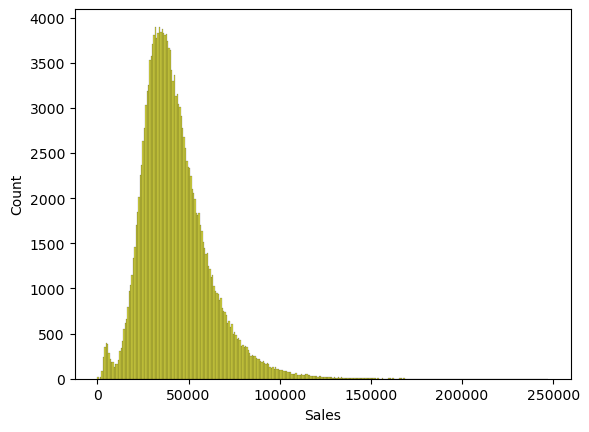

In [55]:
total_sale = df_train["Sales"]
sns.histplot(total_sale, color = 'y')

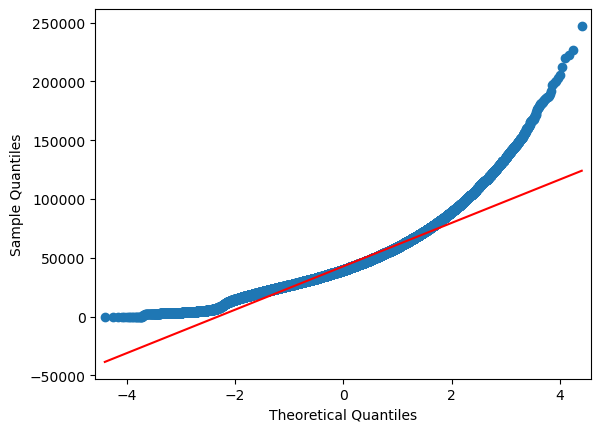

In [56]:
# Q-Q plot (To check whether data is gaussian or not from visual graph)
qqplot(total_sale, line = "s")
plt.show()

In [57]:
# Shapiro test - (To check whether data is Gaussian or not by computing p-value)
# Assumptions -
# H0 : Data is gaussian
# Ha : Data is not gaussian

shapiro(total_sale)

ShapiroResult(statistic=0.9341650605201721, pvalue=0.0)

    # As p-value(0) is lower than alpha(0.05), we reject null hypothesis i.e. the data is not gaussian.
    

In [58]:
# levene test - (To check variance of groups)
# Assumptions -
# H0 : Variances are equal
# Ha : Variances are not equal

levene(s1_store, s2_store, s3_store, s4_store)

LeveneResult(statistic=5206.219646908859, pvalue=0.0)

    As p-value(0) is lower than alpha(0.05), we reject null hypothesis i.e. the Variances are not equal.
    

    From above visual graphs, Q-Q plots, shapiro test & levene test 
    
        the data seems to be non-gaussian in nature, we cannot use Annova test 
        
        So, we will use Kruskal-Wallis Test to check the hypothesis.
        
        

    **Kruskal-Wallis test -

        Null & Alternate Hypothesis -

            1. H0 : Mean sales are similar in different store types.
            
                    (Average is same for all groups).


            2. Ha : Mean sales are different in different store types.
            
                    (Average is not same for all groups).
                    
                    

In [59]:
# Kruskal-Wallis Test -
stats, p_val = kruskal(s1_store, s2_store, s3_store, s4_store)
p_val

0.0

    Conclusion -

        1) p Value(0) is less than the significance value (alpha = 0.05),

            Hence we reject Null Hypothesis.

        2) So we can say that, Mean sales are different in different store types.

            (i.e. Average is not same for all groups).

    Hypothesis 4: Regional Sales Variability.
    

In [60]:
r1_region = df_train[df_train["Region_Code"] == 'R1']["Sales"]
r2_region = df_train[df_train["Region_Code"] == 'R2']["Sales"]
r3_region = df_train[df_train["Region_Code"] == 'R3']["Sales"]
r4_region = df_train[df_train["Region_Code"] == 'R4']["Sales"]

        As we have seen in above case that the distribution of data is not gaussian in nature. 
        
        we will use Kruskal-Wallis Test.
        
        Null & Alternate Hypothesis -

            1. H0 : Mean sales are similar in different regions.

                    (Average is same for all groups).


            2. Ha : Mean sales are different in different regions.

                    (Average is not same for all groups).


In [61]:
# Kruskal-Wallis Test -
stats, p_val = kruskal(r1_region, r2_region, r3_region, r4_region)
p_val

0.0

    Conclusion -

        1) p Value(0) is less than the significance value (alpha = 0.05),

            Hence we reject Null Hypothesis.

        2) So we can say that, Mean sales are different in different regions.

            (i.e. Average is not same for all groups).

---------

    Insights From above Analysis -
    
    1) Total Sales and Quantity:

           The total quantity sold amounts to 12,845,860 units. 
           The total sales amount is 8,058,000,332 (assuming this is in a specific currency).
            
         
    2) Seasonal Sales Patterns:

            There are significant drops in sales around June 2018 and December 2018, 
            suggesting possible seasonal effects or specific events influencing these declines.
            
            
    3) Top Performing Stores:

            Store S1 at Location L1 has the highest sales, surpassing 2 billion units.
            Store S4 at Location L1 also shows high sales, nearing 2 billion units, 
            while other store-location combinations have comparatively lower sales.
            
            
    4) Discount Impact on Sales:

            Sales without discounts constitute approximately 4.17 billion.
            Sales with discounts amount to around 3.89 billion, 
            indicating a substantial portion of sales occur without discounts. 
            
            
    5) Regional Sales Performance:

            Region R1 leads in both sales and orders, followed by Regions R2, R3, and R4.
            Sales and orders vary across regions, with a visual representation indicating the relative volume of each.
            
            
    6) Correlation Between Orders and Sales by Store Type:

            A positive correlation exists between the number of orders and sales across different store types.
            Store S1 (blue) records the highest sales and orders, followed by S4 (orange), S2 (green), and S3 (yellow).
        

    Recommendations based on Insights -
    
        1) Set realistic future sales targets based on the baseline figures.
        
        2) Adjust sales strategies or operational processes to bridge the gap between actual and forecasted sales.
        
        3) Study the successful practices of Store S1 and Store S4 to apply them to other stores.
        
        4) Plan for lower sales on holidays and allocate resources accordingly.
        
        5) Optimize discount strategies to balance between attracting customers and maintaining profitability.
        
        6) Monitor weekly sales patterns to identify and leverage peak sales periods.
        